<a href="https://colab.research.google.com/github/EugeneHsiung/datasci_3_eda/blob/main/datasci_3_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [135]:
!pip install pandas_profiling

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

# Importing Data

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/healthcare_data_cleaning.csv') #from assignment #2
df

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,missing,174,58,430.68365678679174,195,missing,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,missing,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,missing,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,missing,111,165,67,missing,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356
104998,missing,Female,Heidiborough,missing,Yes,No,Cash,Dr. Smith,Covid-19,Med_A,Follow-Up,74,123,167,75,5.341231420036174,180,79,missing,124.4083409893742


In [138]:
df.shape  #105000 rows, 20 columns

(105000, 20)

In [139]:
df.columns

Index(['Patient Age', 'Gender', 'City of Residence', 'State of Residence',
       'Has Insurance', 'Visited Last Month', 'Payment Method',
       'Preferred Doctor', 'Disease Diagnosed', 'Medication Prescribed',
       'Type of Appointment', 'Average Heart Rate', 'Average BP',
       'Height (in cm)', 'Weight (in kg)', 'Payment Due ($)',
       'Last Visit (days ago)', 'Visit Duration (mins)', 'Number of Tests',
       'Prescription Cost ($)'],
      dtype='object')

In [140]:
df.sample(10)      #data sample

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
101300,65,Male,Garciafort,Texas,No,No,Cash,Dr. Jones,Cold,Med_C,Specialist,81,109,missing,49,467.67216644906716,missing,108,5,78.68017792390513
51514,52,Male,East Patricia,California,No,No,Card,Dr. Smith,Allergy,Med_B,Specialist,80,118,177,57,253.22077343030202,182,112,5,130.2988490504005
28743,19,Other,Stephanieland,Wyoming,Yes,Yes,Cash,Dr. Brown,Allergy,Med_A,Specialist,77,112,166,75,199.6890139418015,191,22,1,49.619311093487696
59130,39,missing,Port Richard,South Dakota,Yes,No,Cash,Dr. Brown,Cold,Med_C,Specialist,77,115,190,77,121.7476747514632,192,71,6,27.478831115417428
23366,40,Male,Dawsonborough,Arkansas,No,No,Insurance,Dr. Smith,None,Med_C,General,90,140,190,54,432.01667741995624,166,89,missing,121.6518553178145
23036,33,Female,Port Michellemouth,Colorado,No,No,Cash,Dr. Jones,Allergy,Med_E,Follow-Up,66,98,160,missing,50.93411246496332,186,90,4,68.6032840805602
52210,47,Male,Carpenterland,New Jersey,No,missing,Insurance,Dr. Smith,Flu,Med_B,Follow-Up,93,80,142,68,62.216752360193304,195,28,4,38.72130579894116
104039,42,Other,Stoneborough,Kansas,No,Yes,Card,Dr. Williams,Flu,Med_B,Emergency,95,96,170,80,130.96716685360727,178,61,3,136.41216535910894
52370,41,Male,Port Lisa,Wisconsin,Yes,No,Cash,Dr. Jones,Flu,Med_A,Emergency,83,93,193,85,474.9827273539347,186,31,2,missing
84763,43,Female,South Edward,Colorado,No,Yes,Insurance,Dr. Williams,Flu,Med_C,Specialist,97,119,177,55,420.34841542856896,173,90,6,25.400973348370236


In [141]:
df.isnull().sum()  # Look for missingness

Patient Age              0
Gender                   0
City of Residence        0
State of Residence       0
Has Insurance            0
Visited Last Month       0
Payment Method           0
Preferred Doctor         0
Disease Diagnosed        0
Medication Prescribed    0
Type of Appointment      0
Average Heart Rate       0
Average BP               0
Height (in cm)           0
Weight (in kg)           0
Payment Due ($)          0
Last Visit (days ago)    0
Visit Duration (mins)    0
Number of Tests          0
Prescription Cost ($)    0
dtype: int64

In [142]:
df.dropna()
df

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,missing,174,58,430.68365678679174,195,missing,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,missing,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,missing,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,missing,111,165,67,missing,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356
104998,missing,Female,Heidiborough,missing,Yes,No,Cash,Dr. Smith,Covid-19,Med_A,Follow-Up,74,123,167,75,5.341231420036174,180,79,missing,124.4083409893742


In [143]:
df.dtypes

Patient Age              object
Gender                   object
City of Residence        object
State of Residence       object
Has Insurance            object
Visited Last Month       object
Payment Method           object
Preferred Doctor         object
Disease Diagnosed        object
Medication Prescribed    object
Type of Appointment      object
Average Heart Rate       object
Average BP               object
Height (in cm)           object
Weight (in kg)           object
Payment Due ($)          object
Last Visit (days ago)    object
Visit Duration (mins)    object
Number of Tests          object
Prescription Cost ($)    object
dtype: object

In [144]:
import pandas as pd

# Convert 'Average Heart Rate' to float
df['Average Heart Rate'] = pd.to_numeric(df['Average Heart Rate'], errors='coerce').astype(float)

# Convert 'Average BP' to float
df['Average BP'] = pd.to_numeric(df['Average BP'], errors='coerce').astype(float)

# Convert 'Height (in cm)' to float
df['Height (in cm)'] = pd.to_numeric(df['Height (in cm)'], errors='coerce').astype(float)

# Convert 'Weight (in kg)' to float
df['Weight (in kg)'] = pd.to_numeric(df['Weight (in kg)'], errors='coerce').astype(float)

# Convert 'Payment Due ($)' to float, handling 'missing' values
df.loc[:, 'Payment Due ($)'] = df['Payment Due ($)'].apply(lambda x: float(x) if x != 'missing' else float('nan'))  #Reference using lamdas: https://book.datascience.appliedhealthinformatics.com/docs/Ch2/pandas (2.1)


<ipython-input-144-720f8fc8fd36>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Payment Due ($)'] = df['Payment Due ($)'].apply(lambda x: float(x) if x != 'missing' else float('nan'))  #Reference using lamdas: https://book.datascience.appliedhealthinformatics.com/docs/Ch2/pandas (2.1)


In [145]:
df.dtypes

Patient Age               object
Gender                    object
City of Residence         object
State of Residence        object
Has Insurance             object
Visited Last Month        object
Payment Method            object
Preferred Doctor          object
Disease Diagnosed         object
Medication Prescribed     object
Type of Appointment       object
Average Heart Rate       float64
Average BP               float64
Height (in cm)           float64
Weight (in kg)           float64
Payment Due ($)          float64
Last Visit (days ago)     object
Visit Duration (mins)     object
Number of Tests           object
Prescription Cost ($)     object
dtype: object

# Univariate Analysis
Manually perform a univariate analysis to understand the distribution of each variable. This includes calculating measures of central tendency (mean, median, mode) and measures of spread (range, variance, standard deviation, IQR).
Visualize the distribution of select numerical variables using histograms.

In [146]:
# Statistical Measures
df[['Average Heart Rate','Average BP','Height (in cm)','Weight (in kg)','Payment Due ($)']].describe()

,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($)
count,99722.000000,99745.000000,99756.000000,99736.000000,99771.000000
mean,79.523144,109.513179,174.550483,69.683123,249.687203
std,10.017359,14.399892,10.021194,14.725835,144.562123
min,50.000000,80.000000,140.000000,40.000000,0.000146
25%,73.000000,99.000000,168.000000,59.000000,124.381312
50%,80.000000,110.000000,175.000000,70.000000,249.092391
75%,86.000000,120.000000,181.000000,80.000000,375.210147
max,120.000000,140.000000,210.000000,135.000000,499.999999


In [147]:
# Central tendency and measures of spread for Average Heart Rate
mean3 = df['Average Heart Rate'].mean()
median3 = df['Average Heart Rate'].median()
mode3 = df['Average Heart Rate'].mode().values[0]
range3 = df['Average Heart Rate'].max() - df['Average Heart Rate'].min()
variance3 = df['Average Heart Rate'].var()
std_dev3= df['Average Heart Rate'].std()      #Standard Deviation calculation
iqr3 = df['Average Heart Rate'].quantile(0.75) - df['Average Heart Rate'].quantile(0.25)     #IRQ calculation

In [148]:
print(mean3)
print(median3)
print(mode3)
print(range3)
print(variance3)
print(std_dev3)
print(iqr3)

79.52314434126873
80.0
80.0
70.0
100.3474802986367
10.01735894827757
13.0


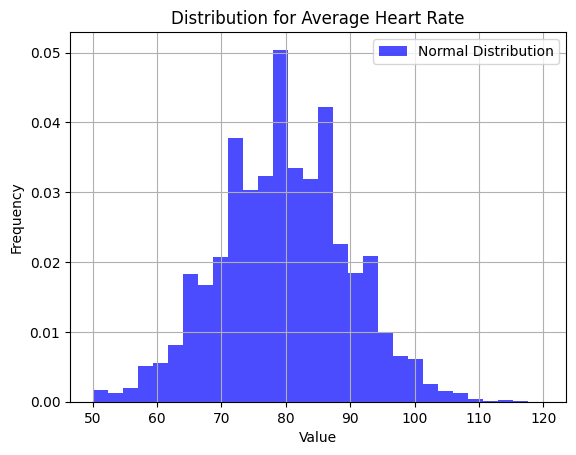

In [149]:
# Histogram for Average Heart Rate
plt.hist(df['Average Heart Rate'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Distribution for Average Heart Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
# Central tendency and measures of spread for Average BP
mean = df['Average BP'].mean()
median = df['Average BP'].median()
mode = df['Average BP'].mode().values[0]
range = df['Average BP'].max() - df['Average BP'].min()
variance = df['Average BP'].var()
std_dev= df['Average BP'].std()      #Standard Deviation calculation
iqr = df['Average BP'].quantile(0.75) - df['Average BP'].quantile(0.25)     #IRQ calculation

In [151]:
print(mean)
print(median)
print(mode)
print(range)
print(variance)
print(std_dev)
print(iqr)

109.51317860544388
110.0
80.0
60.0
207.3568828874232
14.399891766517664
21.0


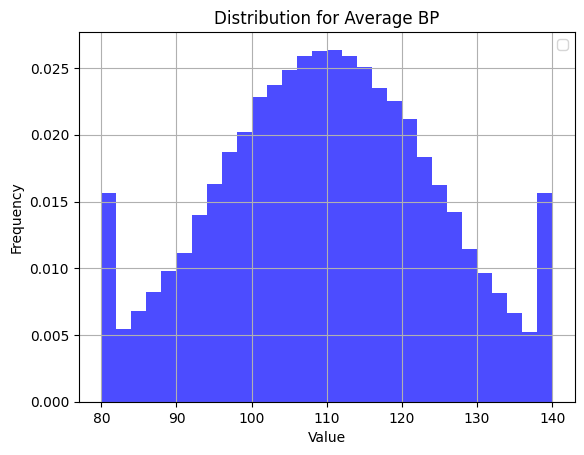

In [152]:
# Histogram for Average BP
plt.hist(df['Average BP'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Distribution for Average BP')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
# Central tendency and measures of spread for Height (in cm)
mean1 = df['Height (in cm)'].mean()
median1 = df['Height (in cm)'].median()
mode1 = df['Height (in cm)'].mode().values[0]
range1 = df['Height (in cm)'].max() - df['Height (in cm)'].min()
variance1 = df['Height (in cm)'].var()
std_dev1= df['Height (in cm)'].std()      #Standard Deviation calculation
iqr1 = df['Height (in cm)'].quantile(0.75) - df['Height (in cm)'].quantile(0.25)     #IRQ calculation

In [154]:
print(mean1)
print(median1)
print(mode1)
print(range1)
print(variance1)
print(std_dev1)
print(iqr1)

174.55048317895665
175.0
174.0
70.0
100.4243272689166
10.021193904366715
13.0


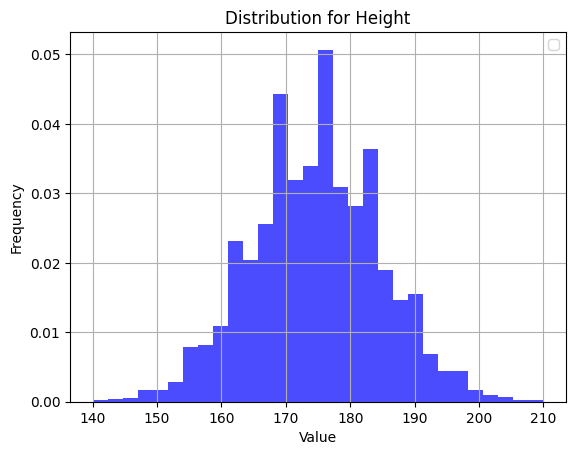

In [155]:
# Histogram for Height (in cm)
plt.hist(df['Height (in cm)'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Distribution for Height')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
# Central tendency and measures of spread for Weight (in kg)
mean2 = df['Weight (in kg)'].mean()
median2 = df['Weight (in kg)'].median()
mode2 = df['Weight (in kg)'].mode().values[0]
range2 = df['Weight (in kg)'].max() - df['Weight (in kg)'].min()
variance2 = df['Weight (in kg)'].var()
std_dev2= df['Weight (in kg)'].std()      #Standard Deviation calculation
iqr2 = df['Weight (in kg)'].quantile(0.75) - df['Weight (in kg)'].quantile(0.25)     #IRQ calculation

In [157]:
print(mean2)
print(median2)
print(mode2)
print(range2)
print(variance2)
print(std_dev2)
print(iqr2)

69.68312344589717
70.0
71.0
95.0
216.8502073834073
14.725834692247748
21.0


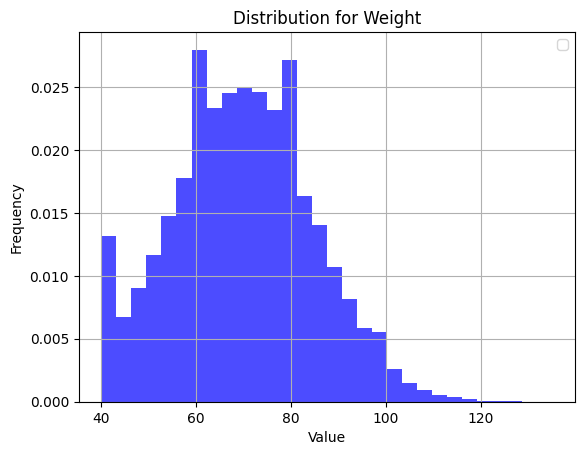

In [158]:
# Histogram for Weight (in kg)
plt.hist(df['Weight (in kg)'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Distribution for Weight')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
# Central tendency and measures of spread for Payment Due ($)
mean4 = df['Payment Due ($)'].mean()
median4 = df['Payment Due ($)'].median()
mode4 = df['Payment Due ($)'].mode().values[0]
range4 = df['Payment Due ($)'].max() - df['Payment Due ($)'].min()
variance4 = df['Payment Due ($)'].var()
std_dev4= df['Payment Due ($)'].std()      #Standard Deviation calculation
iqr4 = df['Payment Due ($)'].quantile(0.75) - df['Payment Due ($)'].quantile(0.25)     #IRQ calculation

In [160]:
print(mean4)
print(median4)
print(mode4)
print(range4)
print(variance4)
print(std_dev4)
print(iqr4)

249.68720297740094
249.09239132193855
0.20270487029577788
499.99985252586214
20898.207356234598
144.56212282695145
250.82883481933075


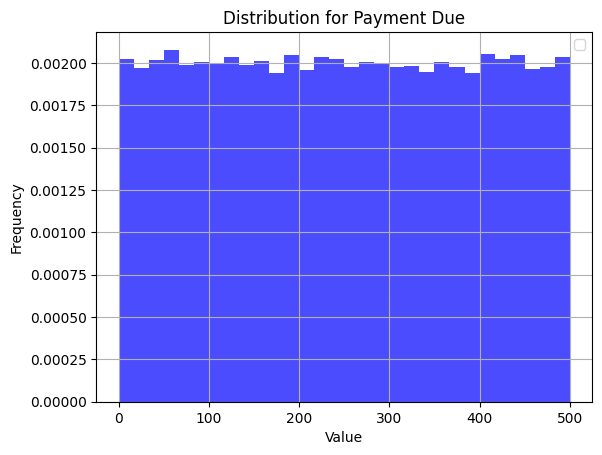

In [161]:
# Histogram for Payment Due ($)
plt.hist(df['Payment Due ($)'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Distribution for Payment Due')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Bivariate Analysis
-Analyze the relationship between pairs of variables.
Use scatter plots to explore potential relationships between two numerical variables.

-For categorical and numerical variable pairs, use boxplots.
Compute correlation coefficients for numerical variables and document any strong correlations observed.

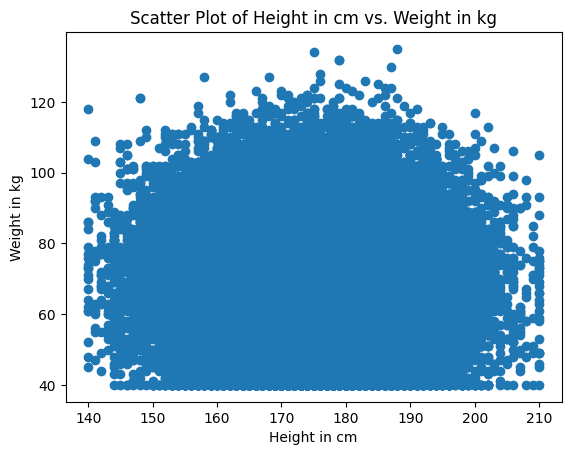

In [162]:
# Scatter plot for height and weight
plt.scatter(df['Height (in cm)'], df['Weight (in kg)'])
plt.title('Scatter Plot of Height in cm vs. Weight in kg')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

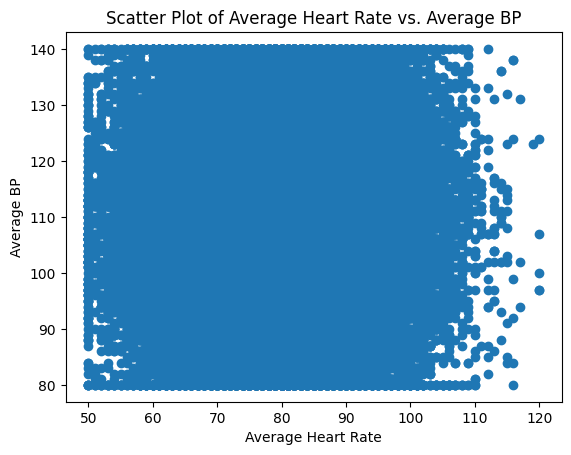

In [163]:
# Scatter plot for Average Heart Rate and Average BP
plt.scatter(df['Average Heart Rate'], df['Average BP'])
plt.title('Scatter Plot of Average Heart Rate vs. Average BP')
plt.xlabel('Average Heart Rate')
plt.ylabel('Average BP')
plt.show()

In [164]:
# Calculate the Spearman correlation matrix
spearman_matrix = df[['Average Heart Rate','Average BP']].corr(method='spearman')  # code from https://book.datascience.appliedhealthinformatics.com/docs/Ch3/correlations_covariances (3.5)
print("Spearman Correlation Matrix:")
print(spearman_matrix)

Spearman Correlation Matrix:
                    Average Heart Rate  Average BP
Average Heart Rate            1.000000   -0.002512
Average BP                   -0.002512    1.000000


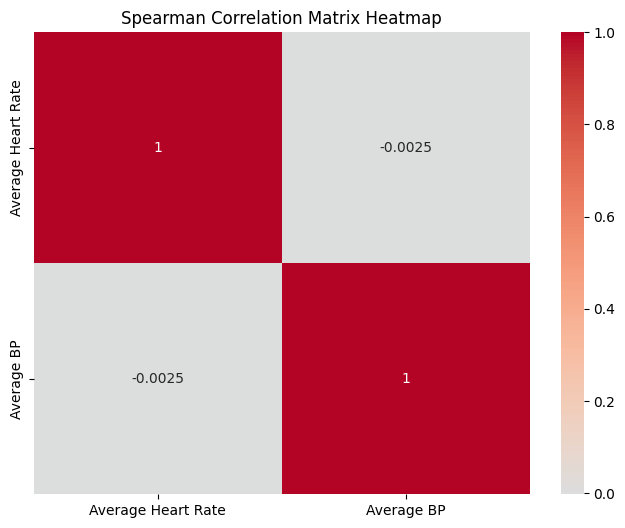

In [165]:
# Create a heatmap of the Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Matrix Heatmap")
plt.show()

#### Spearman rank correlation was used to analyze the average heart rate and average BP. Based on the heatmap, there is a weak relationship between the two variables.

## Handling Outliers

In [166]:
# Calculate quartiles and IQR for 'Average Heart Rate'
Variable = 'Average Heart Rate'
q1 = df[Variable].quantile(0.25)
q3 = df[Variable].quantile(0.75)
irq9 = q3 - q1

# Set threshold for outlier detection
threshold_lower = q1 - 1.5 * irq9
threshold_upper = q3 + 1.5 * irq9

# Identify outliers
outliers = [x for x in df['Average Heart Rate'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [53.0, 53.0, 51.0, 106.0, 53.0, 106.0, 53.0, 106.0, 50.0, 106.0, 107.0, 52.0, 52.0, 110.0, 53.0, 109.0, 109.0, 109.0, 108.0, 111.0, 106.0, 50.0, 115.0, 106.0, 50.0, 50.0, 50.0, 52.0, 50.0, 50.0, 107.0, 109.0, 50.0, 50.0, 50.0, 50.0, 52.0, 53.0, 52.0, 110.0, 108.0, 107.0, 107.0, 53.0, 109.0, 50.0, 50.0, 51.0, 50.0, 51.0, 107.0, 53.0, 50.0, 50.0, 112.0, 53.0, 53.0, 114.0, 52.0, 107.0, 109.0, 106.0, 50.0, 108.0, 110.0, 108.0, 50.0, 106.0, 53.0, 50.0, 106.0, 106.0, 106.0, 111.0, 53.0, 106.0, 113.0, 50.0, 50.0, 106.0, 50.0, 52.0, 50.0, 106.0, 106.0, 51.0, 108.0, 108.0, 106.0, 50.0, 51.0, 107.0, 53.0, 108.0, 108.0, 107.0, 107.0, 106.0, 53.0, 52.0, 51.0, 108.0, 106.0, 52.0, 51.0, 50.0, 107.0, 113.0, 114.0, 51.0, 109.0, 109.0, 107.0, 53.0, 108.0, 53.0, 50.0, 50.0, 52.0, 120.0, 52.0, 52.0, 50.0, 107.0, 52.0, 52.0, 53.0, 51.0, 53.0, 113.0, 106.0, 107.0, 50.0, 116.0, 108.0, 51.0, 111.0, 108.0, 112.0, 114.0, 106.0, 53.0, 110.0, 53.0, 53.0, 106.0, 108.0, 110.0, 106.0, 106.0, 50.0, 52.0, 5

##### I would include these outliers of Average Heart Rate as these are patient's vitals.

In [167]:
# Calculate quartiles and IQR for 'Average BP'
Variable1 = 'Average BP'
q1 = df[Variable1].quantile(0.25)
q3 = df[Variable1].quantile(0.75)
irq10 = q3 - q1

# Set threshold for outlier detection
threshold_lower = q1 - 1.5 * irq10
threshold_upper = q3 + 1.5 * irq10

# Identify outliers
outliers = [x for x in df['Average BP'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: []


##### As seen with the output of print("Outliers:", outliers) for Average BP, there were no outliers. If there were, it would not be appropriate to remove these outliers as these are patient's vitals.

In [168]:
# Calculate quartiles and IQR for 'Height (in cm)'
Variable2 = 'Height (in cm)'
q1 = df[Variable2].quantile(0.25)
q3 = df[Variable2].quantile(0.75)
irq11 = q3 - q1

# Set threshold for outlier detection
threshold_lower = q1 - 1.5 * irq11
threshold_upper = q3 + 1.5 * irq11

# Identify outliers
outliers = [x for x in df['Height (in cm)'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [202.0, 148.0, 204.0, 147.0, 204.0, 145.0, 203.0, 201.0, 147.0, 146.0, 202.0, 201.0, 201.0, 202.0, 144.0, 145.0, 207.0, 141.0, 146.0, 148.0, 206.0, 148.0, 148.0, 144.0, 201.0, 201.0, 148.0, 202.0, 205.0, 146.0, 147.0, 201.0, 201.0, 145.0, 203.0, 201.0, 146.0, 202.0, 210.0, 202.0, 141.0, 145.0, 201.0, 148.0, 143.0, 142.0, 146.0, 209.0, 145.0, 202.0, 204.0, 202.0, 205.0, 203.0, 203.0, 206.0, 201.0, 206.0, 140.0, 203.0, 201.0, 140.0, 210.0, 146.0, 201.0, 207.0, 147.0, 141.0, 143.0, 147.0, 207.0, 143.0, 204.0, 147.0, 201.0, 140.0, 201.0, 148.0, 210.0, 146.0, 140.0, 210.0, 143.0, 201.0, 201.0, 142.0, 148.0, 204.0, 201.0, 148.0, 201.0, 144.0, 201.0, 146.0, 144.0, 147.0, 148.0, 201.0, 145.0, 141.0, 202.0, 144.0, 202.0, 147.0, 201.0, 145.0, 201.0, 204.0, 147.0, 144.0, 201.0, 147.0, 148.0, 144.0, 148.0, 206.0, 202.0, 147.0, 201.0, 204.0, 210.0, 202.0, 146.0, 145.0, 202.0, 202.0, 140.0, 145.0, 201.0, 148.0, 204.0, 201.0, 201.0, 203.0, 206.0, 205.0, 205.0, 143.0, 205.0, 201.0, 206.0, 14

In [169]:
# Calculate quartiles and IQR for 'Weight (in kg)'
Variable3 = 'Weight (in kg)'
q1 = df[Variable3].quantile(0.25)
q3 = df[Variable3].quantile(0.75)
irq12 = q3 - q1

# Set threshold for outlier detection
threshold_lower = q1 - 1.5 * irq12
threshold_upper = q3 + 1.5 * irq12

# Identify outliers
outliers = [x for x in df['Weight (in kg)'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [112.0, 116.0, 121.0, 121.0, 132.0, 121.0, 114.0, 113.0, 127.0, 115.0, 112.0, 113.0, 112.0, 122.0, 112.0, 113.0, 113.0, 119.0, 114.0, 113.0, 114.0, 114.0, 115.0, 119.0, 117.0, 115.0, 114.0, 116.0, 112.0, 112.0, 112.0, 113.0, 117.0, 124.0, 113.0, 112.0, 113.0, 115.0, 120.0, 115.0, 112.0, 118.0, 134.0, 112.0, 130.0, 125.0, 112.0, 124.0, 118.0, 114.0, 115.0, 115.0, 112.0, 114.0, 119.0, 122.0, 118.0, 113.0, 114.0, 114.0, 117.0, 122.0, 112.0, 119.0, 112.0, 113.0, 113.0, 117.0, 117.0, 112.0, 115.0, 112.0, 124.0, 117.0, 116.0, 117.0, 113.0, 115.0, 113.0, 115.0, 121.0, 112.0, 112.0, 113.0, 116.0, 112.0, 126.0, 115.0, 116.0, 114.0, 112.0, 116.0, 113.0, 113.0, 120.0, 112.0, 115.0, 116.0, 113.0, 113.0, 121.0, 113.0, 112.0, 112.0, 113.0, 121.0, 113.0, 112.0, 118.0, 114.0, 112.0, 114.0, 113.0, 113.0, 116.0, 117.0, 117.0, 114.0, 114.0, 112.0, 112.0, 116.0, 116.0, 112.0, 115.0, 114.0, 116.0, 118.0, 114.0, 112.0, 116.0, 115.0, 122.0, 116.0, 115.0, 112.0, 112.0, 118.0, 120.0, 112.0, 122.0, 11

##### I would include both of the outlier data (Height and Weight) as these are patient's individual data that can be used for other calculations such as BMI

In [170]:
# Calculate quartiles and IQR for 'Payment Due ($)'
Variable4 = 'Payment Due ($)'
q1 = df[Variable4].quantile(0.25)
q3 = df[Variable4].quantile(0.75)
irq13 = q3 - q1

# Set threshold for outlier detection
threshold_lower = q1 - 1.5 * irq13
threshold_upper = q3 + 1.5 * irq13

# Identify outliers
outliers = [x for x in df['Payment Due ($)'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: []


##### As seen from print("Outliers:", outliers), there were no outliers. If there were I would not remove them as they pertain to payment information based on patient.

## Automated Analysis:
- Using the automated EDA tool pandas profiling (e.g., please refer to https://book.datascience.appliedhealthinformatics.com/docs/Ch3/automatic_EDA)
-Load in your dataset and analyze it
Save the output (.html) in your report, within a folder called automaticEDA

In [171]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/healthcare_data_cleaning.csv')

# Generate the EDA report
report = ProfileReport(data)
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]